<a href="https://colab.research.google.com/github/furkanardadincer/CreditRiskPrediction/blob/main/LRegression_KrediRiskTahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Mount Google Drive
df = pd.read_csv('/content/drive/MyDrive/giveMeSomeCredit/archive/cs-training.csv')

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['NumberOfDependents'].fillna(0, inplace=True)

<ipython-input-4-41d74a777578>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
<ipython-input-4-41d74a777578>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [5]:
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
# Modeli tanımla
sgd_model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=1, warm_start=True)


In [9]:
# Eğitim simülasyonu (epoch bazlı)
epochs = 20
train_acc = []
val_acc = []

In [10]:
for epoch in range(epochs):
    sgd_model.fit(X_train, y_train)

    y_train_pred = sgd_model.predict(X_train)
    y_val_pred = sgd_model.predict(X_test)

    train_acc.append(accuracy_score(y_train, y_train_pred))
    val_acc.append(accuracy_score(y_test, y_val_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

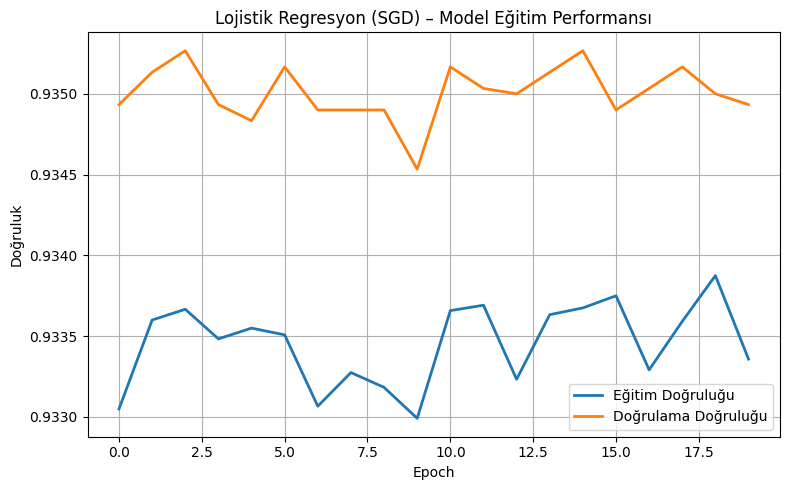

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(train_acc, label='Eğitim Doğruluğu', linewidth=2)
plt.plot(val_acc, label='Doğrulama Doğruluğu', linewidth=2)
plt.title('Lojistik Regresyon (SGD) – Model Eğitim Performansı')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
y_proba = sgd_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print("=== Lojistik Regresyon Performans Raporu ===")
print(classification_report(y_test, sgd_model.predict(X_test)))
print(f"ROC AUC Skoru: {roc_auc:.4f}")

=== Lojistik Regresyon Performans Raporu ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.53      0.02      0.03      1956

    accuracy                           0.93     30000
   macro avg       0.73      0.51      0.50     30000
weighted avg       0.91      0.93      0.91     30000

ROC AUC Skoru: 0.6752


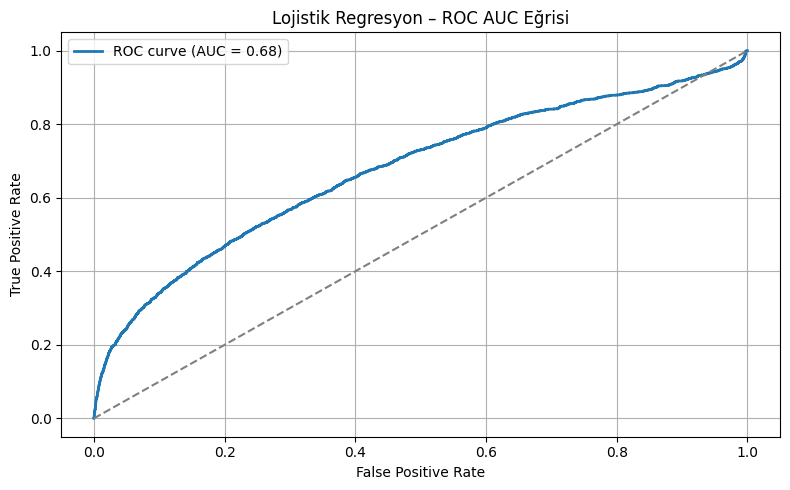

In [13]:
# ROC Eğrisi
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Lojistik Regresyon – ROC AUC Eğrisi')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()